# Exploratory Data Analysis 

In [20]:
# imprt libraries 
import os 
from glob import glob
import numpy as np
import pandas as pd
from osgeo import gdal
import rasterio 
from rasterio.plot import show
from rasterio.merge import merge
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

from utils import utils
from utils import util_preprocess

## Fetch data

In [3]:
# load contextual ffeature 

RasterTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final/rgb/*.tif'))
MaskTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final//mask/*.tif'))

In [4]:
Tiles = []
for item in zip(RasterTiles, MaskTiles):
    # print(item)
    Tiles.append(item)


len(Tiles)

import random
random.seed(42)
random.shuffle(Tiles)

print(Tiles[1])

('D:/GWU/ML4DAM/data/accra/final/rgb\\acc_area8.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area8.tif')


In [5]:
RasterTiles = []
MaskTiles = []
for raw_image, label in Tiles:
    RasterTiles.append(raw_image)
    MaskTiles.append(label)

In [6]:
raster_to_mosiac = []

for p in RasterTiles:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtrain, out_transform = merge(raster_to_mosiac)
print(Xtrain.shape)

raster_to_mosiac = []

for p in MaskTiles:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytrain, out_transform = merge(raster_to_mosiac)
print(ytrain.shape)

(4, 1642, 1568)
(1, 1642, 1568)


In [7]:
X_train = Xtrain[:, Xtrain[0,...]!=-9999]
y_train = ytrain[:, ytrain[0,...]!=-9999]
y_train =y_train.astype(int)
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training data set\n', frequencies)
print(X_train.shape)
print(y_train.shape)

Training data set
 [[     0 500078]
 [     1 146212]]
(4, 646290)
(1, 646290)


In [8]:
print(type(X_train))
X_train= np.transpose(X_train)
X_train.shape
print(X_train.shape)
y_train= np.transpose(y_train)
print(y_train.shape)


<class 'numpy.ndarray'>
(646290, 4)
(646290, 1)


In [9]:
bandnames = ['blue', 'green', 'red', 'nir']

df_train = pd.DataFrame(X_train, columns=bandnames)
print(df_train.shape)

name = ["class"]
df_class= pd.DataFrame(y_train, columns=name)
print(df_class.shape)

(646290, 4)
(646290, 1)


<AxesSubplot: >

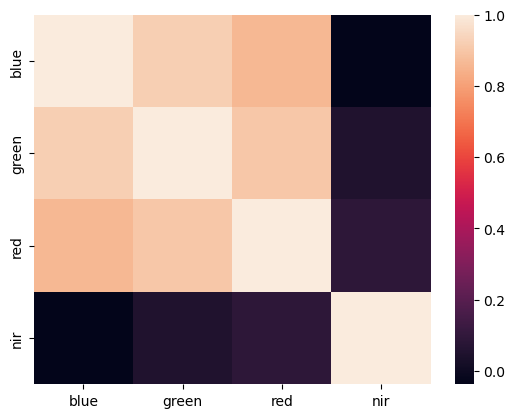

In [11]:
sns.heatmap(df_train.corr())

In [12]:
# Histogram of the raw bands

data = pd.concat([df_class, df_train], axis=1)
data.head()


,class,blue,green,red,nir
0,0,0.059028,0.098153,0.125805,0.273429
1,0,0.062360,0.102734,0.132140,0.276951
2,0,0.051786,0.087688,0.105847,0.276673
3,0,0.037459,0.072495,0.077943,0.271073
4,0,0.036033,0.069297,0.073564,0.270485


[Text(0.5, 1.0, 'Formal')]

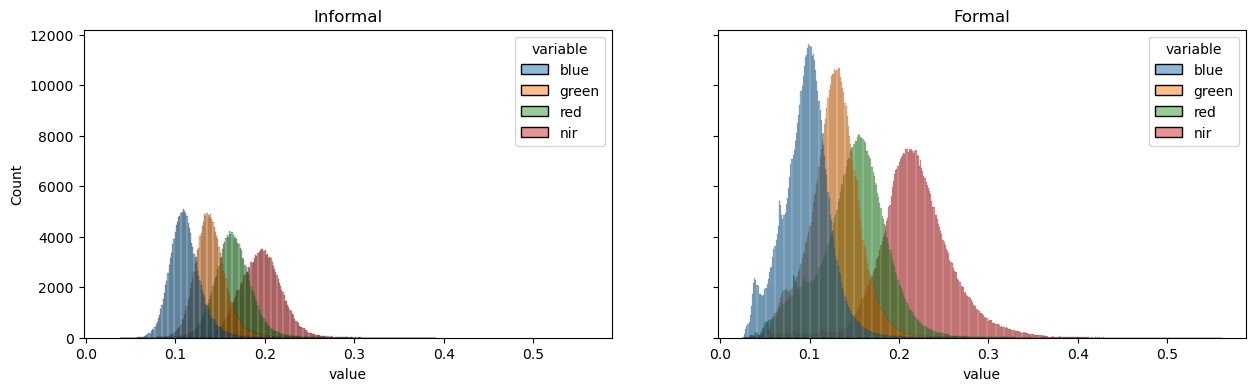

In [13]:
# Histogram of the raw bands
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 4), sharey=True, sharex=True)

sns.histplot(data=pd.melt(data[data['class'] ==1], 
                          value_vars=['blue','green','red', 'nir']), x="value", 
             hue="variable",ax=ax1).set(title='Informal')
sns.histplot(data=pd.melt(data[data['class'] ==0], 
                          value_vars=['blue','green','red', 'nir']), x="value", 
             hue="variable",ax=ax2).set(title='Formal')


[Text(0.5, 1.0, 'Informal')]

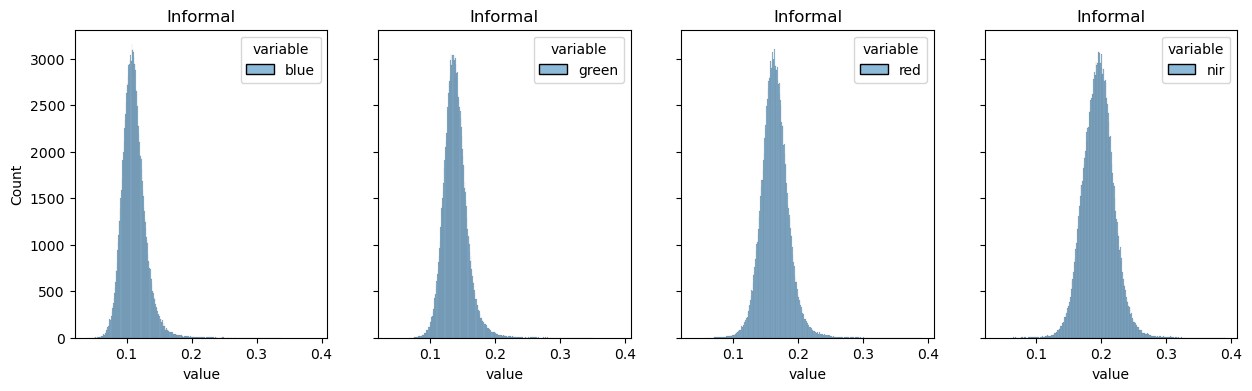

In [16]:
# individual bands 

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(15, 4), sharey=True, sharex=True)
# sns.histplot(data=pd.melt(data[data['class'] ==1], 
#                           value_vars=['blue']), x="value", 
#              hue="variable",ax=ax1).set(title='Informal')
# sns.histplot(data=pd.melt(data[data['class'] ==1], 
#                           value_vars=['green']), x="value", 
#              hue="variable",ax=ax2).set(title='Informal')
# sns.histplot(data=pd.melt(data[data['class'] ==1], 
#                           value_vars=['red']), x="value", 
#              hue="variable",ax=ax3).set(title='Informal')
# sns.histplot(data=pd.melt(data[data['class'] ==1], 
#                           value_vars=['nir']), x="value", 
#              hue="variable",ax=ax4).set(title='Informal')

[Text(0.5, 1.0, 'nir')]

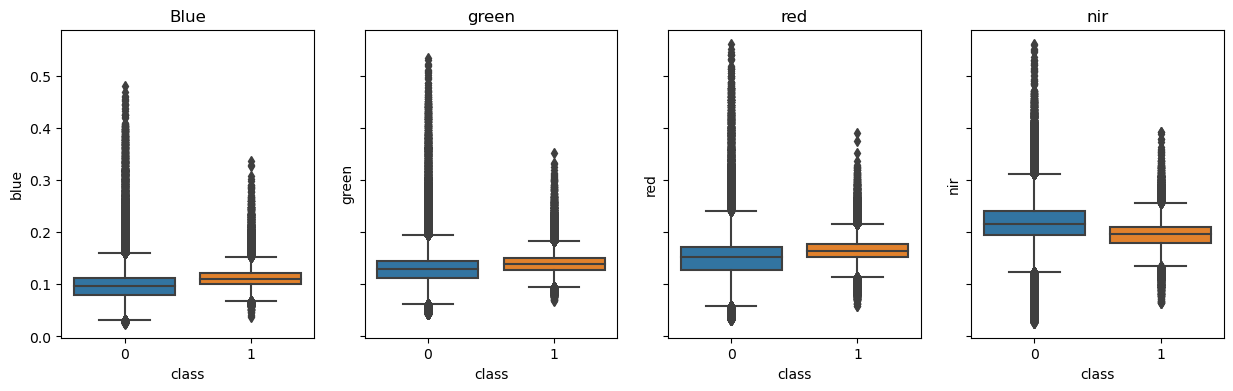

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(15, 4), sharey=True, sharex=True)
sns.boxplot(x='class', y='blue', data=data, ax=ax1).set(title='Blue')
sns.boxplot(x='class', y='green', data=data, ax=ax2).set(title='green')
sns.boxplot(x='class', y='red', data=data, ax=ax3).set(title='red')
sns.boxplot(x='class', y='nir', data=data, ax=ax4).set(title='nir')

## Contextual feature 

In [10]:
# load contextual ffeature 

RasterTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final/spfea/*.tif'))
MaskTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final//mask/*.tif'))

In [11]:
Tiles = []
for item in zip(RasterTiles, MaskTiles):
    # print(item)
    Tiles.append(item)


len(Tiles)

import random
random.seed(42)
random.shuffle(Tiles)

print(Tiles[1])

('D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area8.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area8.tif')


In [12]:
RasterTiles = []
MaskTiles = []
for raw_image, label in Tiles:
    RasterTiles.append(raw_image)
    MaskTiles.append(label)

In [13]:
raster_to_mosiac = []

for p in RasterTiles:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtrain, out_transform = merge(raster_to_mosiac)
print(Xtrain.shape)

raster_to_mosiac = []

for p in MaskTiles:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytrain, out_transform = merge(raster_to_mosiac)
print(ytrain.shape)

(45, 1642, 1568)
(1, 1642, 1568)


In [14]:
X_train = Xtrain[:, Xtrain[0,...]!=-9999]
y_train = ytrain[:, ytrain[0,...]!=-9999]
y_train =y_train.astype(int)
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training data set\n', frequencies)
print(X_train.shape)
print(y_train.shape)

Training data set
 [[     0 500078]
 [     1 146212]]
(45, 646290)
(1, 646290)


In [15]:
print(type(X_train))
X_train= np.transpose(X_train)
X_train.shape
print(X_train.shape)
y_train= np.transpose(y_train)
print(y_train.shape)

<class 'numpy.ndarray'>
(646290, 45)
(646290, 1)


In [16]:
# setting outfile name

#  list use defined features

gabor = ['D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_1.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_3.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_5.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_7.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_9.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_11.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_filter_13.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc3_mean.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_1.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_3.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_5.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_7.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_9.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_11.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_filter_13.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc5_mean.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_1.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_3.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_5.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_7.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_9.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_11.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_filter_13.tif',
                'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/gabor/gabor_sc7_mean.tif']


Ibpm = ['D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/lbpm/lbpm_sc7_max.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/lbpm/lbpm_sc7_skew.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/lbpm/lbpm_sc7_kurtosis.tif']

mean = ['D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/mean/mean_sc3_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/mean/mean_sc5_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/mean/mean_sc7_mean.tif',]

ndvi = ['D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/ndvi/ndvi_sc3_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/ndvi/ndvi_sc5_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/ndvi/ndvi_sc7_mean.tif']

sfs = [ 'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc31_max_line_length.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc31_max_ratio_of_orthogonal_angles.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc31_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc31_std.tif',
         'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc51_max_line_length.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc51_max_ratio_of_orthogonal_angles.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc51_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc51_std.tif',
         'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc71_max_line_length.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc71_max_ratio_of_orthogonal_angles.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc71_mean.tif',
        'D:/GWU/ML4DAM/data/accra/accra_spfeas_10m/sfs/sfs_sc71_std.tif',]


spfea = gabor + Ibpm + mean + ndvi + sfs 


bandname = []
    # loop from input 
for file in spfea:
    head, tail = os.path.split(file)
    col_names=tail[:-4]
    bandname.append(col_names)
print(bandname)

['gabor_sc3_filter_1', 'gabor_sc3_filter_3', 'gabor_sc3_filter_5', 'gabor_sc3_filter_7', 'gabor_sc3_filter_9', 'gabor_sc3_filter_11', 'gabor_sc3_filter_13', 'gabor_sc3_mean', 'gabor_sc5_filter_1', 'gabor_sc5_filter_3', 'gabor_sc5_filter_5', 'gabor_sc5_filter_7', 'gabor_sc5_filter_9', 'gabor_sc5_filter_11', 'gabor_sc5_filter_13', 'gabor_sc5_mean', 'gabor_sc7_filter_1', 'gabor_sc7_filter_3', 'gabor_sc7_filter_5', 'gabor_sc7_filter_7', 'gabor_sc7_filter_9', 'gabor_sc7_filter_11', 'gabor_sc7_filter_13', 'gabor_sc7_mean', 'lbpm_sc7_max', 'lbpm_sc7_skew', 'lbpm_sc7_kurtosis', 'mean_sc3_mean', 'mean_sc5_mean', 'mean_sc7_mean', 'ndvi_sc3_mean', 'ndvi_sc5_mean', 'ndvi_sc7_mean', 'sfs_sc31_max_line_length', 'sfs_sc31_max_ratio_of_orthogonal_angles', 'sfs_sc31_mean', 'sfs_sc31_std', 'sfs_sc51_max_line_length', 'sfs_sc51_max_ratio_of_orthogonal_angles', 'sfs_sc51_mean', 'sfs_sc51_std', 'sfs_sc71_max_line_length', 'sfs_sc71_max_ratio_of_orthogonal_angles', 'sfs_sc71_mean', 'sfs_sc71_std']


In [18]:

df_train = pd.DataFrame(X_train, columns=bandname)
print(df_train.shape)

name = ["class"]
df_class= pd.DataFrame(y_train, columns=name)
print(df_class.shape)

(646290, 45)
(646290, 1)


<AxesSubplot: >

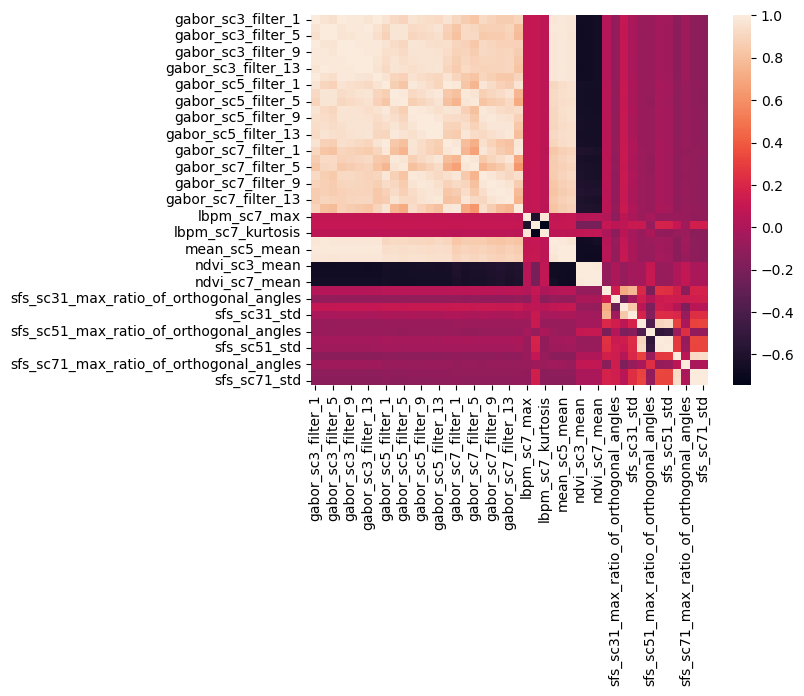

In [21]:
sns.heatmap(df_train.corr())